# 분석 목적 : 
### 연비가 좋은 차를 구입하고자 하는 사람들에게 경차, 소형, 중형, 대형 별로 연비가 가장 좋은 차를 30대씩 선정해주고, 이에 대해 연비에 대한 가격을 예측할 수 있는 모델을 만들고자 함

## 어려운 경기 속에서 조금이라도 경제적인 요소를 고려하는 사람들을 위해 유지비가 낮은 차량 선택에 도움을 주는 예측 모델을 만드는 것을 목표로 한다.

1. 경차/소형/중형/대형차 별로 연비가 좋은 상위 순위 30개를 택한다.

2. 해당 30개 중에서 단종된 모델을 제외해서(이때 빠진만큼 차순위 차종을 추가로 조사한다) 각 차종별로 가격을 구한다.

3. 연비와 가격을 이용하여, 연비와 가격간의 상관관계를 구한 다음, 특정 연비에 대한 가격을 구하는 예측 모델을 구한다. 

### *가격은 최고값으로 한다.
### *가격은 카이즈유 사이트를 기준으로 하되, 카이즈유에 없는 경우는 구글 검색을 통하여 구한다.

- 필요한거 다 실행

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

import seaborn as sns

%precision 3
%matplotlib inline

# 경차 데이터 가져오기

In [2]:
lightcar = pd.read_csv('경차.csv')

In [10]:
lightcar

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106,경차,1180
1,모닝(JA)1.0가솔린 (15),기아,휘발유,998,자동4,15.4,경형,106,경차,1195
2,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106,경차,1234
3,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106,경차,1280
4,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109,경차,1020
5,스파크 밴 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109,경차,1060
6,스파크 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109,경차,1030
7,스파크 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109,경차,1058
8,스파크 1.0,한국지엠,휘발유,999,자동5,14.7,경형,113,경차,1125
9,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,자동4,14.7,경형,111,경차,1195


# 경차의 복합연비와 가격에 따른 산점도

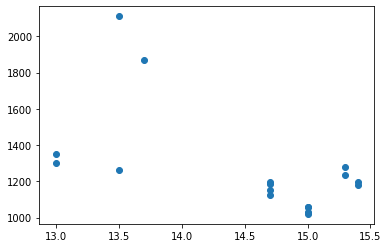

In [11]:
plt.scatter( lightcar[ '복합연비' ],lightcar[ '가격' ] )

In [12]:
lc_linear = stats.pearsonr( lightcar.복합연비, lightcar.가격 )

In [13]:
lc_linear

(-0.5632716862034074, 0.018550112446620574)

# 경차에 따른 회귀분석

In [16]:
formula = '복합연비~가격'
result = smf.ols( formula, lightcar ).fit()
result.summary()

C:\Python\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     6.971
Date:                Thu, 02 Jul 2020   Prob (F-statistic):             0.0186
Time:                        13:57:05   Log-Likelihood:                -17.324
No. Observations:                  17   AIC:                             38.65
Df Residuals:                      15   BIC:                             40.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5892      0.801     20.702      0.000      14.881      18.297
가격            -0.0016      0.001     -2.640      0.019      -0.003      -0.000
==============================================================================
Omnibus:                        4.908   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                3.090
Skew:                          -1.040   Prob(JB):                        0.213
Kurtosis:                       3.197   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 소형차 데이터 가져오기

In [17]:
smallcar = pd.read_csv('소형차.csv')

In [18]:
smallcar

,Unnamed: 0,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,1939.0,아이오닉 1.6GDI 플러그인하이브리드 개조차_6DCT,현대,전기+휘발유,1580.0,자동6,28.3,PHEV,17.0,소형차,3383.0
1,66.0,아이오닉 1.6GDI 하이브리드 6DCT_15''타이어,현대,휘발유,1580.0,자동6,22.4,1등급,69.0,소형차,2725.0
2,1958.0,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,1580.0,자동6,20.5,PHEV,17.0,소형차,3134.0
3,65.0,아이오닉 1.6GDI 하이브리드 6DCT_17''타이어,현대,휘발유,1580.0,자동6,20.2,1등급,78.0,소형차,2590.0
4,64.0,니로 1.6GDI 하이브리드_16''타이어 (15),기아,휘발유,1580.0,자동6,19.5,1등급,79.0,소형차,2749.0
5,2.0,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580.0,자동6,19.3,1등급,82.0,소형차,2270.0
6,36.0,토요타 Prius C,토요타,휘발유,1497.0,무단변속,18.6,1등급,84.0,소형차,2590.0
7,1957.0,니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15),기아,전기+휘발유,1580.0,자동6,18.6,PHEV,26.0,소형차,3242.0
8,47.0,K3 1.6 디젤(4DR) 7DCT_ISG (15),기아,경유,1582.0,자동7,18.4,1등급,100.0,소형차,2420.0
9,72.0,아반떼(AD) 1.6디젤_7DCT ISG (15''/16''타이어) (15),현대,경유,1582.0,자동7,18.4,1등급,100.0,소형차,2155.0


# 소형차의 복합연비와 가격에 따른 산점도

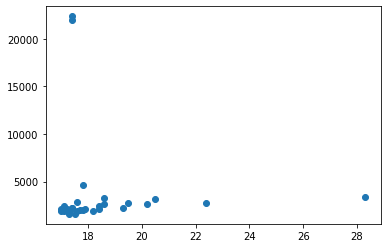

In [21]:
plt.scatter( smallcar[ '복합연비' ], smallcar[ '가격' ] )
# 2개의 이상치가 보인다. 

# 소형차의 이상치 2개 ( 2억따리 ) 제거 

In [34]:
smallcardrop = smallcar.drop( [ smallcar.index[ 18 ], smallcar.index[ 19 ], smallcar.index[ 30 ] ] )
# index30은 결측치 제거 

# 다시 소형차의 산점도 그리기

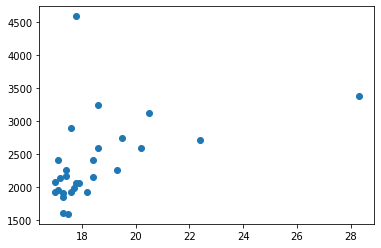

In [28]:
plt.scatter( smallcardrop[ '복합연비' ], smallcardrop[ '가격' ] )

In [30]:
sc_linear = stats.pearsonr( smallcardrop.복합연비, smallcardrop.가격 )

In [31]:
sc_linear

(0.4556774801790012, 0.014815198241621596)

# 소형차에 따른 회귀 분석

In [33]:
formula = '복합연비~가격'
result = smf.ols(formula, smallcardrop).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     6.813
Date:                Thu, 02 Jul 2020   Prob (F-statistic):             0.0148
Time:                        14:30:30   Log-Likelihood:                -59.139
No. Observations:                  28   AIC:                             122.3
Df Residuals:                      26   BIC:                             124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.6070      1.547      9.439      0.000      11.426      17.788
가격             0.0016      0.001      2.610      0.015       0.000       0.003
==============================================================================
Omnibus:                       32.062   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.285
Skew:                           2.160   Prob(JB):                     2.04e-21
Kurtosis:                      10.938   Cond. No.                     9.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 중형차 데이터 가져오기 

In [56]:
middlecar = pd.read_csv('중형차.csv', encoding = 'utf-8' )

In [57]:
middlecar

,Unnamed: 0,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,15,토요타 Prius 2WD,토요타,휘발유,1798,무단변속,22.4,1등급,68,중형차,3378
1,62,토요타 PRIUS,토요타,휘발유,1798,무단변속,21.9,1등급,71,중형차,3500
2,1955,토요타 Prius Prime,토요타,전기+휘발유,1798,무단변속,21.4,PHEV,23,중형차,4770
3,0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74,중형차,3693
4,9,쏘나타(DN8) 2.0GDI 하이브리드_16인치타이어,현대,휘발유,1999,자동6,20.1,1등급,79,중형차,2961
5,10,쏘나타(DN8) 2.0GDI 하이브리드_16인치(빌트인캠),현대,휘발유,1999,자동6,19.8,1등급,80,중형차,2754
6,55,ACCORD HYBRID,혼다,휘발유,1993,무단변속,19.3,1등급,83,중형차,4180
7,7,쏘나타(DN8) 2.0GDI 하이브리드_17인치타이어,현대,휘발유,1999,자동6,19.1,1등급,83,중형차,3579
8,29,ACCORD HYBRID,혼다,휘발유,1993,무단변속,18.9,1등급,82,중형차,4430
9,8,쏘나타(DN8) 2.0GDI 하이브리드_17인치(빌트인캠),현대,휘발유,1999,자동6,18.8,1등급,85,중형차,3397


# 중형차의 복합연비와 가격에 따른 산점도

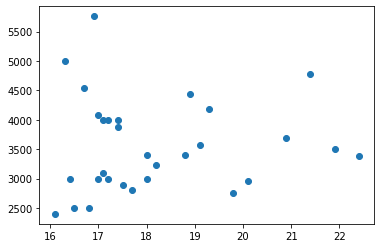

In [58]:
plt.scatter( middlecar[ '복합연비' ], middlecar[ '가격' ] )

In [59]:
mc_linear = stats.pearsonr( middlecar.복합연비, middlecar.가격 )

In [60]:
mc_linear

(0.05580387571375334, 0.769605408276897)

# 중형차에 따른 회귀분석

In [61]:
formula = ' 복합연비 ~ 가격 '
result = smf.ols( formula, middlecar ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.08747
Date:                Thu, 02 Jul 2020   Prob (F-statistic):              0.770
Time:                        15:17:53   Log-Likelihood:                -58.548
No. Observations:                  30   AIC:                             121.1
Df Residuals:                      28   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.7414      1.485     11.951      0.000      14.700      20.782
가격             0.0001      0.000      0.296      0.770      -0.001       0.001
==============================================================================
Omnibus:                        6.031   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.205
Skew:                           1.020   Prob(JB):                       0.0741
Kurtosis:                       3.019   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 대형차 데이터 불러오기

In [72]:
df = pd.read_csv('대형차.csv', encoding = 'utf-8' )

In [78]:
df.head()

,"번호,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류, 가격"
0,"53,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,..."
1,"17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,..."
2,"24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,..."
3,"52,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급..."
4,"23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등..."


# 데이터의 행 나누기 

In [74]:
df1 = pd.DataFrame(index=range( 0,30 ), columns=[ '번호','모델명','제조사','유종','배기량','변속형식','복합연비','등급','CO2배출량','분류', '가격' ])

In [75]:
df1[ '번호' ], df1[ '모델명' ], df1[ '제조사' ], df1[ '유종' ], df1[ '배기량' ], df1[ '변속형식' ], df1[ '복합연비' ], df1[ '등급' ], df1[ 'CO2배출량' ], df1[ '분류' ], df1[ '가격' ] = df[ '번호,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류, 가격' ].str.split( ',',10 ).str

C:\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


# 다시출력 

In [84]:
df1

,번호,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류,가격
0,53,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,1등급,95.0,대형차,4220
1,17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0,대형차,4000
2,24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차,6680
3,52,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급,95.0,대형차,3870
4,23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0,대형차,4740
5,39,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급,102.0,대형차,3870
6,6,"""K7 2.4하이브리드 (PE/17""""타이어)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차,3975
7,57,그랜저 2.4 하이브리드 (15),현대,휘발유,2359,자동6,16.2,1등급,97.0,대형차,4432
8,59,"""K7 2.4하이브리드 (17""""타이어) (15)""",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차,3975
9,99,토요타 RAV4 Hybrid 2WD,토요타,휘발유,2487,무단변속,15.9,2등급,101.0,대형차,3590


# 대형차의 복합연비와 가격에 따른 산점도

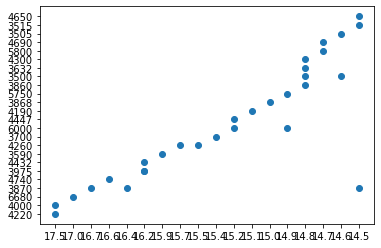

In [81]:
plt.scatter( df1[ '복합연비' ], df1[ '가격' ] )

# 대형차에 따른 회귀 분석

In [91]:
# 에러 떠서 데이터타입 확인해봄

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      30 non-null     object 
 1   모델명     30 non-null     object 
 2   제조사     30 non-null     object 
 3   유종      30 non-null     object 
 4   배기량     30 non-null     object 
 5   변속형식    30 non-null     object 
 6   복합연비    30 non-null     float64
 7   등급      30 non-null     object 
 8   CO2배출량  30 non-null     object 
 9   분류      30 non-null     object 
 10  가격      30 non-null     int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 2.7+ KB


In [92]:
# 다 문자열이라 회귀분석할 변수들 숫자열도 변경

df1[ '복합연비' ] = pd.to_numeric( df1[ '복합연비' ] )
df1[ '가격' ] = pd.to_numeric( df1[ '가격' ] )

In [90]:
formula = ' 복합연비 ~ 가격 '
result = smf.ols( formula, df1 ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   복합연비   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.1686
Date:                Thu, 02 Jul 2020   Prob (F-statistic):              0.685
Time:                        16:21:06   Log-Likelihood:                -39.470
No. Observations:                  30   AIC:                             82.94
Df Residuals:                      28   BIC:                             85.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1184      0.897     16.854      0.000      13.281      16.956
가격          8.303e-05      0.000      0.411      0.685      -0.000       0.000
==============================================================================
Omnibus:                        4.049   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.670
Skew:                           0.816   Prob(JB):                        0.160
Kurtosis:                       2.477   Cond. No.                     2.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""